In [1]:
# libraries
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus  

# datasets
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
X = wine.data
y = wine.target
X_columns = wine.feature_names

In [4]:
# Split the data set into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

In [5]:
clf = DecisionTreeClassifier(random_state=45, class_weight=None, criterion='entropy', splitter='best')

Which criterion is better? Entropy or Gini impurity?

$\textit{Gini}: \mathit{Gini}(E) = 1 - \sum_{j=1}^{c}p_j^2$

$\textit{Entropy}: H(E) = -\sum_{j=1}^{c}p_j\log p_j$

Based on the paper $^{1}$, the choice of criterion between Entropy and Gini impurity does not matter too much and there are only 2% difference in practice.


$^{1}$: https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf

$^{2}$: More information: https://github.com/rasbt/python-machine-learning-book/blob/master/faq/decision-tree-binary.md


In [6]:
model = clf.fit(X_train, y_train)

In [7]:
# Check the accuracy of the training as well as testing
print('Test: {}, Training: {}'.format(clf.score(X_test, y_test) , clf.score(X_train, y_train)))

Test: 0.9444444444444444, Training: 1.0


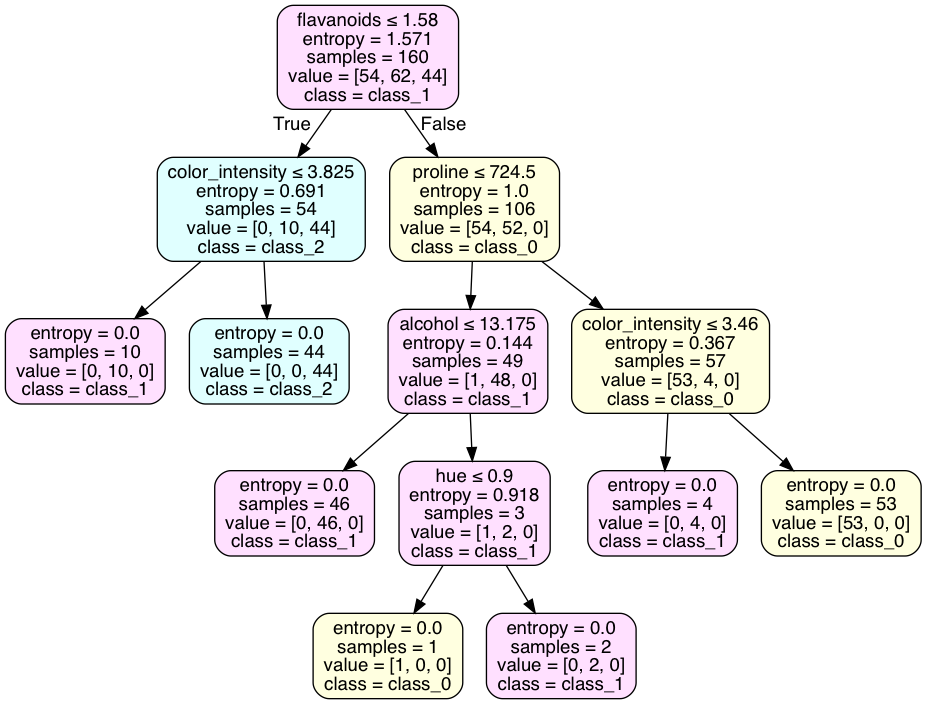

In [8]:
#https://stackoverflow.com/questions/23557545/how-to-explain-the-decision-tree-from-scikit-learn

dot_data = export_graphviz(clf, out_file=None,  
                     feature_names=X_columns,
                     class_names= wine.target_names,  
                     filled=True, rounded=True,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)

## Color of nodes
nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')];
        color = {0: [255,255,224], 1: [255,224,255], 2: [224,255,255],}
        values = color[values.index(max(values))]; 
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2]); 
        node.set_fillcolor(color )


Image(graph.create_png()) 

Here the value is the number of the samples that is in that class. 

As in the root node, `[54, 62, 44]` means there are *54* sample of class_0, *62* sample of class_1 and *44* sample of class_2 in this node.